In [1]:
%matplotlib inline 

In [2]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
import PIL

from datasets.ICDAR.ICDAR import IcdarMerge
from utils.visualization import create_merge_result_image

In [3]:
ds = tfds.load(r"icdar_merge", split='train')

2022-01-31 19:42:17.539542: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


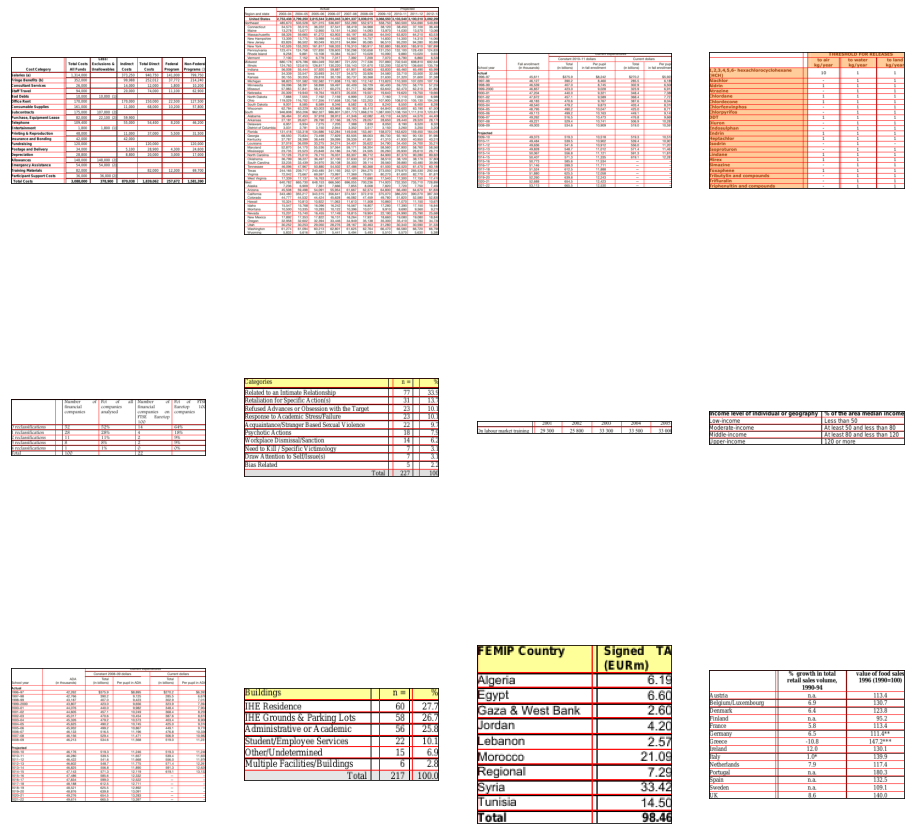

In [4]:
fig, axes = plt.subplots(3, 4, figsize=(16,16))

for element, ax in zip(ds.take(12), axes.flat):
    table_image = PIL.Image.fromarray(element['image'].numpy())
    debug_image = create_merge_result_image(
        table_image, 
        element['horz_split_points_binary'].numpy(), 
        element['vert_split_points_binary'].numpy(),
        element['merge_right_mask'].numpy(),
        element['merge_down_mask'].numpy()
    )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(debug_image)
plt.show()